<h2>Map Contour</h2>
<p>This code will generate the contour data from the given map.png

In [ ]:
# libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
os.getcwd()

'd:\\Coding\\War of the ring\\War-of-the-Ring\\notebook'

In [3]:
root = "../src/assets/map/"

In [4]:
map = cv2.imread(root + 'map.png')
map_rgb = cv2.cvtColor(map, cv2.COLOR_BGR2RGB)

In [5]:
def plot_map(map, cmap=None):
    plt.figure(figsize=(10, 5))
    plt.axis('off')
    if cmap != None:
        plt.imshow(map)
    else:
        plt.imshow(map, cmap=cmap)

In [6]:
length_y, length_x, _ = map.shape

## Trimming the board

In [ ]:
# cut the map so that only the main board remains
black_strip = np.zeros((50,3), dtype='uint8')
x_mid, y_mid = length_x//2, length_y//2
right_x, left_x = 0, length_x
up_y, down_y = 0, length_y

# find right_x
for i in range(0, length_x//2):
    if np.all(map[y_mid-25:y_mid+25, right_x, :] == black_strip):
        break
    right_x += 1
# find left_x
for i in range(0, length_x//2):
    if np.all(map[y_mid-25:y_mid+25, left_x-1, :] == black_strip):
        break
    left_x -= 1
# find up_y
for i in range(0, length_y//2):
    if np.all(map[up_y, x_mid-25:x_mid+25, :] == black_strip):
        break
    up_y += 1
# find down_y
for i in range(0, length_y//2):
    if np.all(map[down_y-1, x_mid-25:x_mid+25, :] == black_strip):
        break
    down_y -= 1

# cutout map
map_cut = map_rgb[up_y:down_y, right_x:left_x, :]

In [7]:
map_cut = cv2.imread(root + 'map_cut.png')
map_cut = cv2.cvtColor(map_cut, cv2.COLOR_BGR2RGB)

## Applying Canny edge detection

In [78]:
# Canny edge detection
map_gray = cv2.cvtColor(map_cut, cv2.COLOR_RGB2GRAY)

# gaussian blur
map_blurred = cv2.GaussianBlur(map_gray, (5,5), 1.4)
# canny edge detection
edges = cv2.Canny(map_blurred, 200, 300)

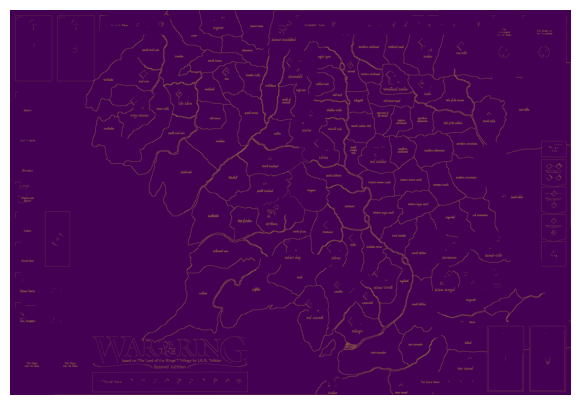

In [79]:
plot_map(edges, cmap='gray')

In [80]:
cv2.imwrite(root + 'map_edges_strong.png', edges)

True